# IMPORTING LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans 
%matplotlib inline
print("Setup complete")

Setup complete


## Reading data into variable 'genre'

In [2]:
genre = pd.read_csv('data_w_genres.csv')
genre.sample(5)

,artists,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count,genres
7076,Elle King,0.135920,0.581400,194825.200000,0.8122,0.000053,0.260360,-4.662000,0.075520,143.697200,0.463200,62.800000,7,1,10,[]
16767,Monica Moore Smith,0.423000,0.638000,131285.000000,0.5490,0.000000,0.328000,-5.575000,0.035600,127.603000,0.929000,3.000000,1,1,1,[]
5436,Daniel James,0.210000,0.892000,263359.000000,0.6190,0.000000,0.081800,-5.728000,0.096800,130.983000,0.920000,54.000000,10,1,1,[]
21993,Smog,0.401078,0.577400,312738.600000,0.4140,0.310236,0.117460,-12.826400,0.042180,114.555800,0.477200,46.400000,11,1,10,"['alternative country', 'alternative rock', 'a..."
9811,Heitor dos Prazeres,0.995571,0.613714,168224.571429,0.2090,0.757000,0.171143,-14.388143,0.210829,79.398286,0.814286,0.142857,3,1,7,['samba']


## Cleaning data

In [3]:
genre['artists'] = genre['artists'].apply(lambda x: x[1:-1].replace("'", ''))


# DIFFERENTIATE GENRES

In [4]:
song_features = pd.DataFrame()

scaler = MinMaxScaler()
for col in genre.iloc[:,:-1].columns:
    if genre[col].dtypes in ['float64', 'int64']:
        scaler.fit(genre[[col]])
        song_features[col] = scaler.transform(genre[col].values.reshape(-1,1)).ravel()     

## Best K value

In [5]:
km = KMeans()
k_rng = range(1,200)
sse = []
for i in k_rng:
    km = KMeans(n_clusters = i)
    km.fit(song_features.sample(1000))
    
    sse.append(km.inertia_) 

## K Plot

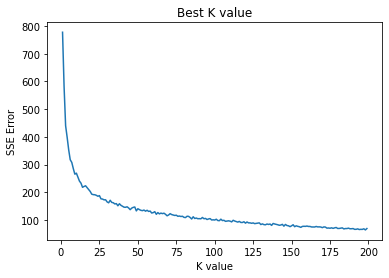

In [6]:
plt.plot(k_rng,sse)
plt.xlabel('K value')
plt.ylabel('SSE Error')
plt.title('Best K value')

plt.show()

## Genres

In [7]:
km = KMeans(n_clusters=25)
predicted_genres = km.fit_predict(song_features)

In [8]:
song_features['predicted_genres'] = predicted_genres
song_features['predicted_genres'] = song_features['predicted_genres'].apply(lambda x: 'Genre'+ str(x))

In [9]:
song_features.sample(10)

,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count,predicted_genres
26341,0.987952,0.221095,0.104779,0.110000,0.887000,0.100404,0.591047,0.043465,0.416647,0.075378,0.357895,0.181818,1.0,0.000000,Genre18
15463,0.976908,0.542596,0.040951,0.077500,0.000000,0.121090,0.671286,0.132780,0.437699,0.113017,0.000000,0.181818,1.0,0.000000,Genre3
24817,0.014065,0.561739,0.048353,0.693375,0.003990,0.135570,0.847329,0.031769,0.553486,0.567861,0.501316,0.363636,1.0,0.004730,Genre1
6754,0.923025,0.680865,0.029847,0.214000,0.000000,0.200135,0.759007,0.195816,0.467701,0.614531,0.003509,0.818182,1.0,0.000631,Genre4
14081,0.213353,0.593813,0.070109,0.892500,0.000000,0.392079,0.972865,0.482365,0.569832,0.760848,0.678947,0.090909,1.0,0.000946,Genre17
7991,0.173695,0.552738,0.036402,0.647500,0.003077,0.146317,0.851236,0.033091,0.561871,0.801715,0.631579,0.909091,1.0,0.000946,Genre21
9584,0.946452,0.321839,0.076437,0.260333,0.000026,0.283552,0.705786,0.119018,0.370221,0.170905,0.000000,0.454545,1.0,0.001577,Genre3
7890,0.524240,0.485946,0.043718,0.456143,0.006293,0.166844,0.828782,0.128897,0.547992,0.194753,0.685714,0.818182,0.0,0.001892,Genre2
847,0.247942,0.707911,0.049612,0.902500,0.000096,0.157164,0.914716,0.033921,0.534580,0.784057,0.610526,1.000000,1.0,0.000946,Genre21
24957,0.947122,0.206220,0.077707,0.140958,0.550176,0.170846,0.658590,0.046119,0.476129,0.061579,0.090351,0.454545,1.0,0.003469,Genre0


## Genres Plot

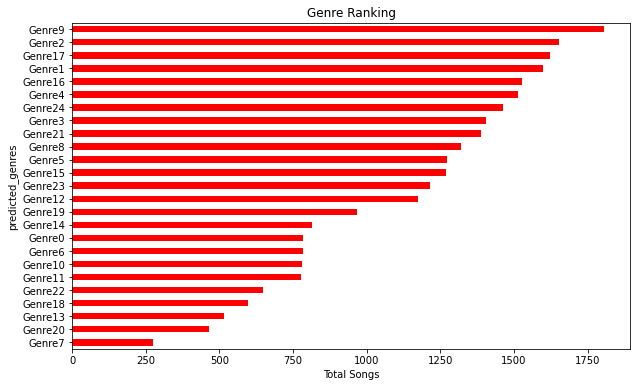

In [10]:
genres_grp = song_features.groupby(['predicted_genres']).size()
plt.figure(figsize=(10,6))
genres_grp.sort_values(ascending=True).plot.barh(color='red')
plt.xlabel('Total Songs')
plt.title('Genre Ranking')
plt.show()